In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
df.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.shape

(177866, 17)

In [5]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   Country                                            177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
df.isnull().sum()

VIN (1-10)                                             0
Country                                                5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
a = [1, 2, 3]
b = [4, 5, 6]

print(a + b)

[1, 2, 3, 4, 5, 6]


# analyzing the EV Adoption Over Time

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

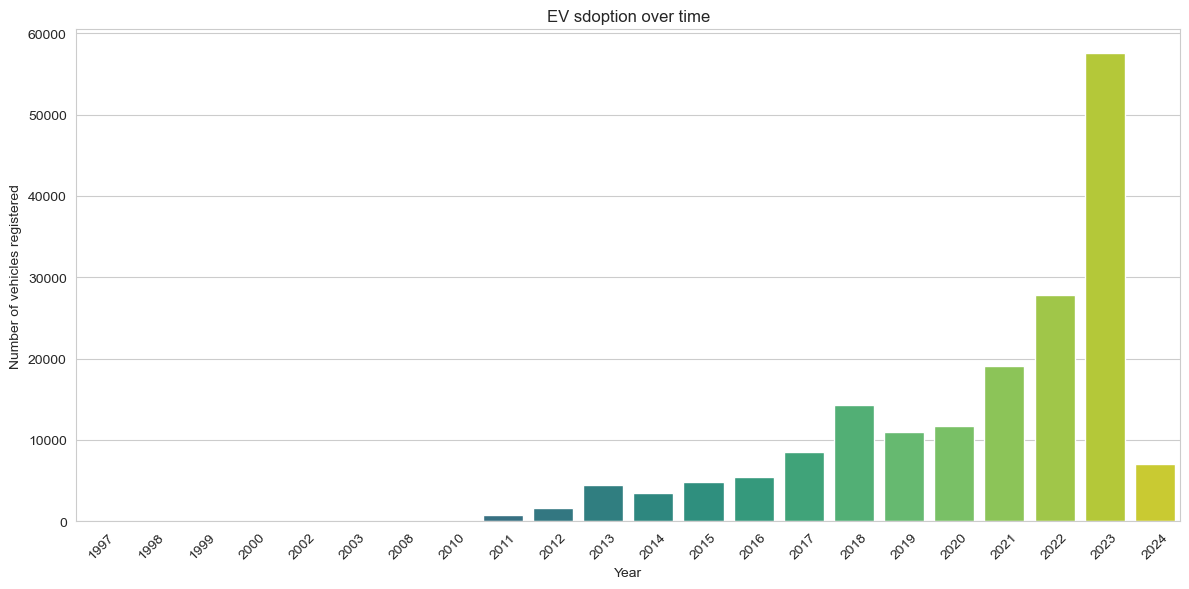

Conclusion: From the above bar chart , it is clear that EV sales has been increasing over time , especially noting a significant upward trend starting around 2016


In [10]:
ev_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette='viridis')
plt.title('EV sdoption over time')
plt.xlabel('Year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Conclusion: From the above bar chart , it is clear that EV sales has been increasing over time , especially noting a significant upward trend starting around 2016')

# Geographical distribution

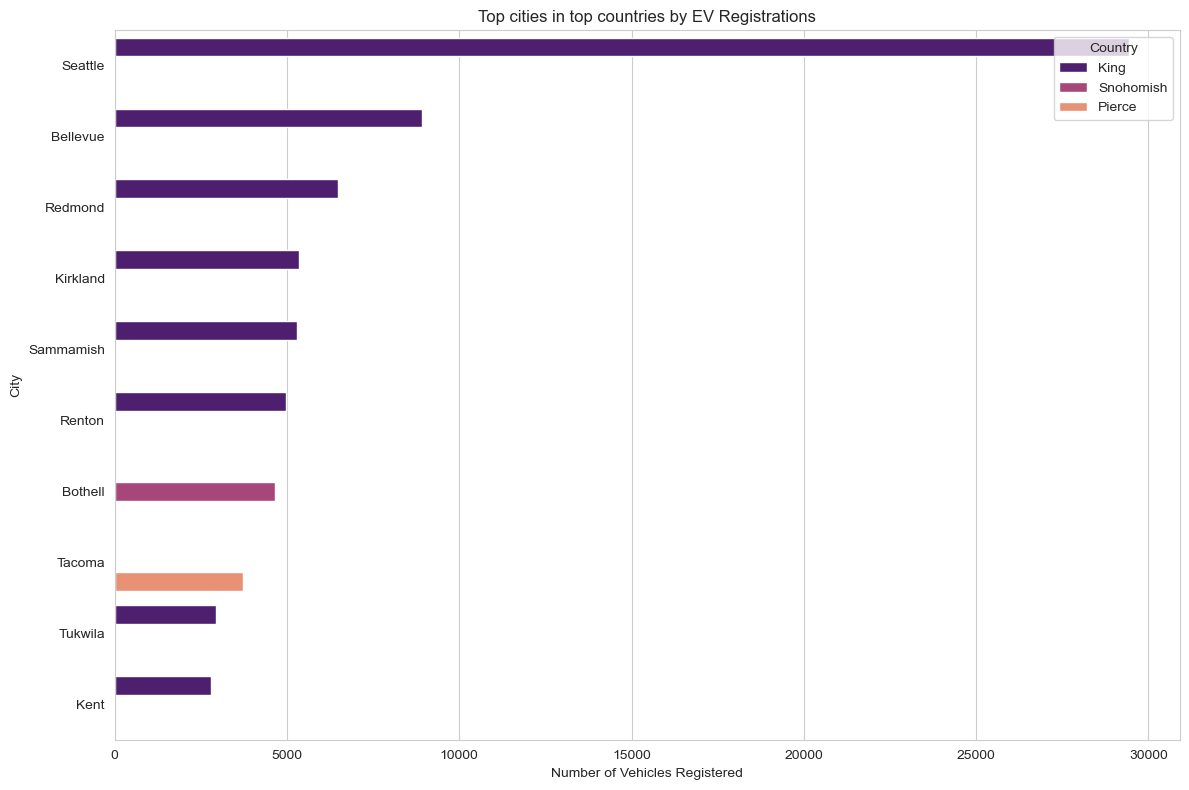

In [11]:
ev_country_dist = df['Country'].value_counts()
top_countries = ev_country_dist.head(3).index
# filtering the dataset for these top counties
top_countries_data = df[df['Country'].isin(top_countries)]
# analysing the distribution of EVs within the cities
ev_city_dist_top_countries = top_countries_data.groupby(['Country','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
#visualize the top 10 cities
top_cities = ev_city_dist_top_countries.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='City', hue='Country', data=top_cities, palette='magma')
plt.title('Top cities in top countries by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# EV Types distribution

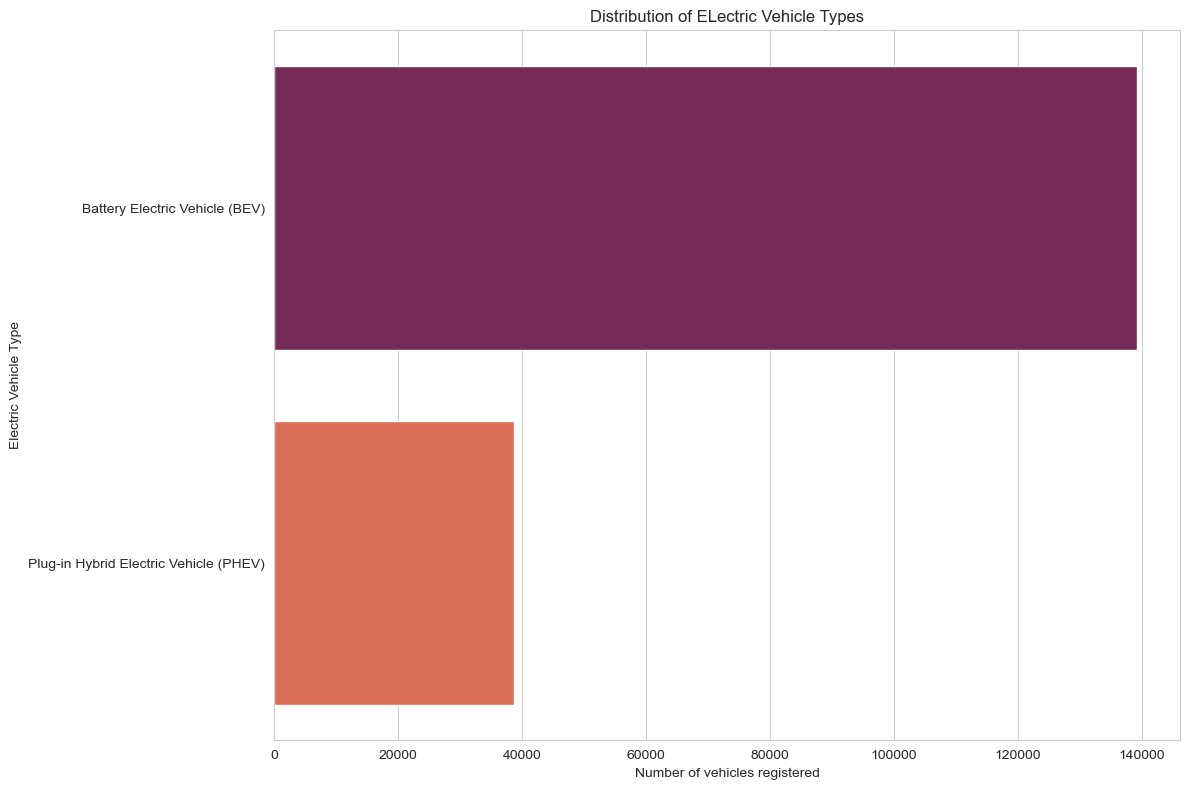

In [12]:
ev_type_dist = df['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=ev_type_dist.values, y= ev_type_dist.index, palette='rocket')
plt.title('Distribution of ELectric Vehicle Types')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

# Make and Model distribution

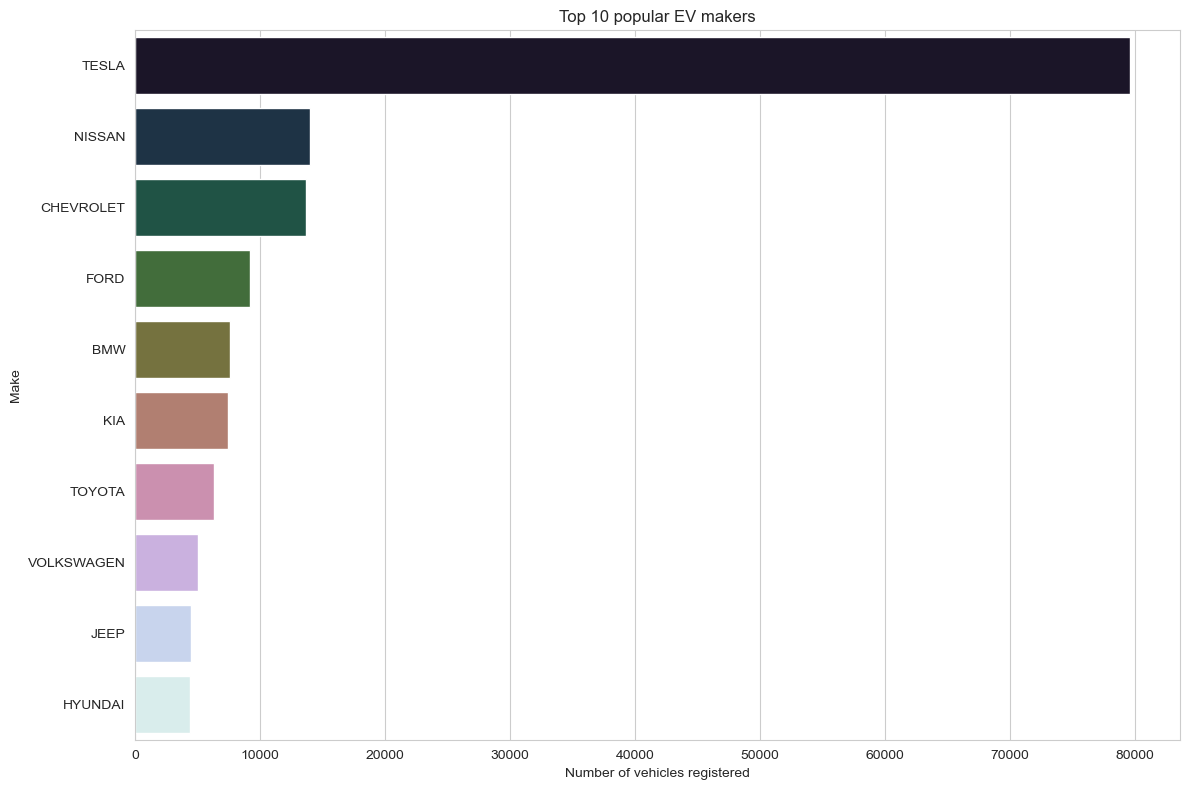

Conclusion: From the graph is clear that TESLA is marketleader in EV manufacturing followed by NISSAN & CHEVEROLET


In [13]:
# Top 10 EV manufactureres
ev_make_dist =df['Make'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(x= ev_make_dist.values, y = ev_make_dist.index, palette='cubehelix')
plt.title('Top 10 popular EV makers')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()
print('Conclusion: From the graph is clear that TESLA is marketleader in EV manufacturing followed by NISSAN & CHEVEROLET')

<function matplotlib.pyplot.show(close=None, block=None)>

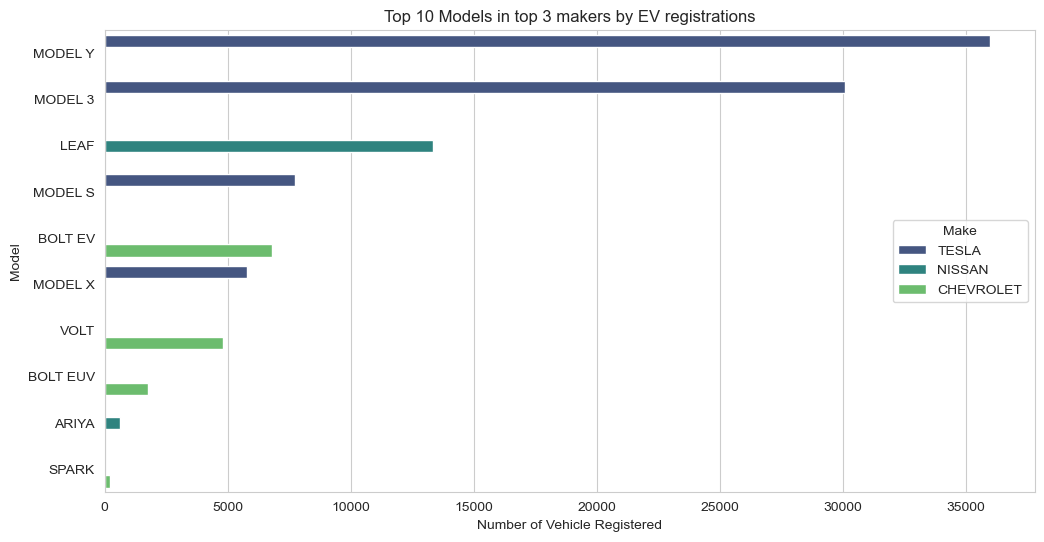

In [14]:
top_3_makers =ev_make_dist.head(3).index
top_3_maker_data = df[df['Make'].isin(top_3_makers)]
ev_model_dist_top_3_maker = top_3_maker_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_10_models = ev_model_dist_top_3_maker.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_10_models, palette='viridis')
plt.title('Top 10 Models in top 3 makers by EV registrations')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
#plt.tight_layout()
plt.show

# Electric Range distribution

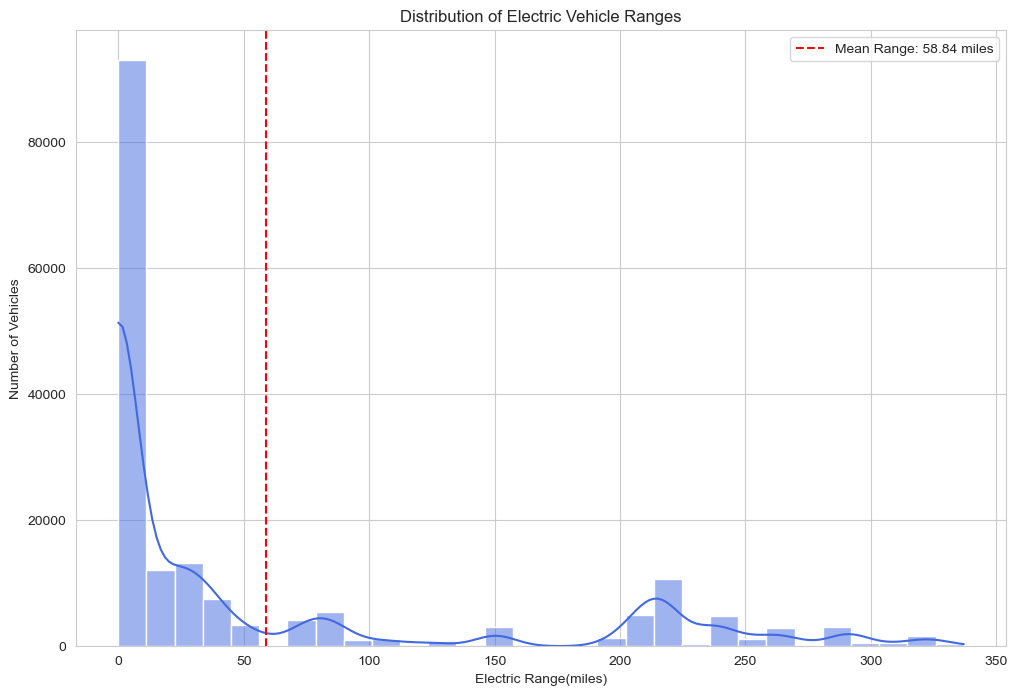

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range(miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

# Average electric range by model year

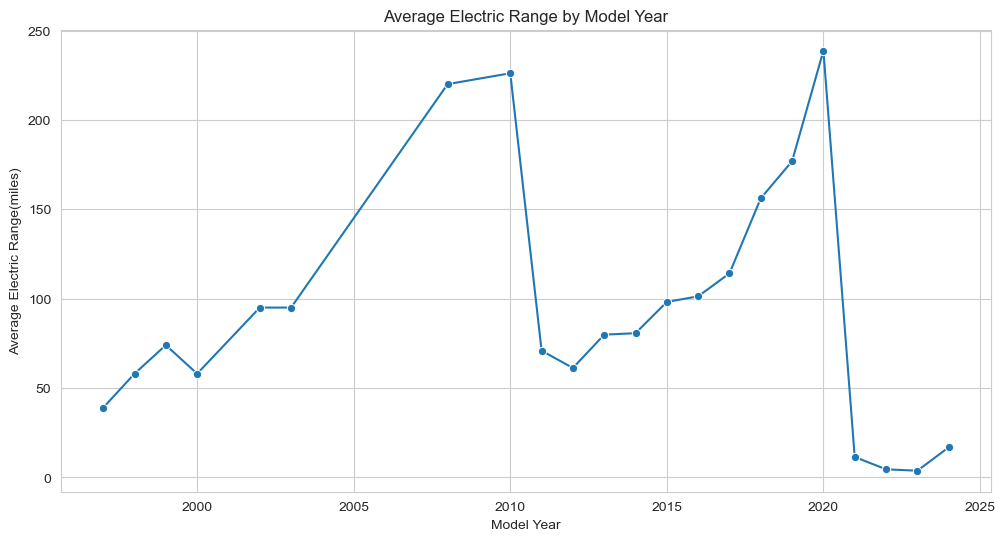

In [16]:
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y='Electric Range', data= average_range_by_year, marker='o')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range(miles)')
plt.grid(True)
plt.show()

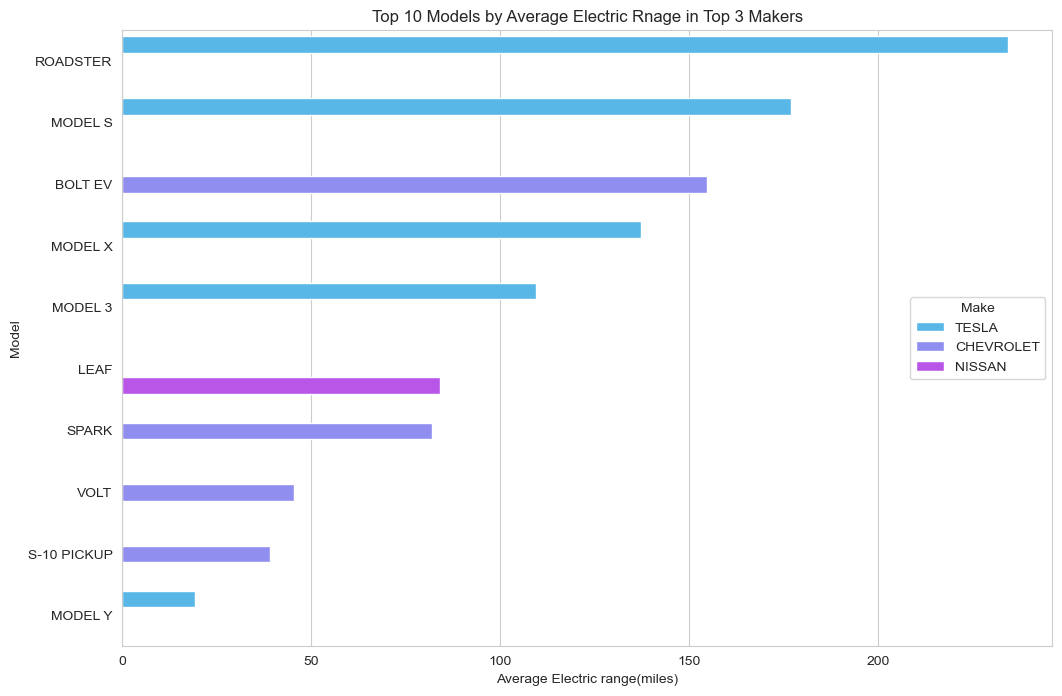

In [17]:
average_range_by_model = top_3_maker_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
#taking out top 10 models by average electric range
top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette='cool')
plt.title('Top 10 Models by Average Electric Rnage in Top 3 Makers')
plt.xlabel('Average Electric range(miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

# Estimated Market Size Analysis of Electric Vehicles in the United States

In [18]:
from scipy.optimize import curve_fit
import numpy as np

In [19]:
# calculating no of EV registered each year
ev_register_counts = df['Model Year'].value_counts().sort_index()
ev_register_counts

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_register_counts[ev_register_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x,a,b):
    return a*np.exp(b*x)

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

#use the fitted function to forecast the no of EV for years 2024 to 2030
forecast_years = np.arange(2024, 2030) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years,*params)

# create a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), np.round(forecasted_values, 0)))
forecasted_evs

{2024: 79092.0,
 2025: 119565.0,
 2026: 180748.0,
 2027: 273240.0,
 2028: 413061.0,
 2029: 624431.0}

# Plotting the estimated market size data:

<function matplotlib.pyplot.show(close=None, block=None)>

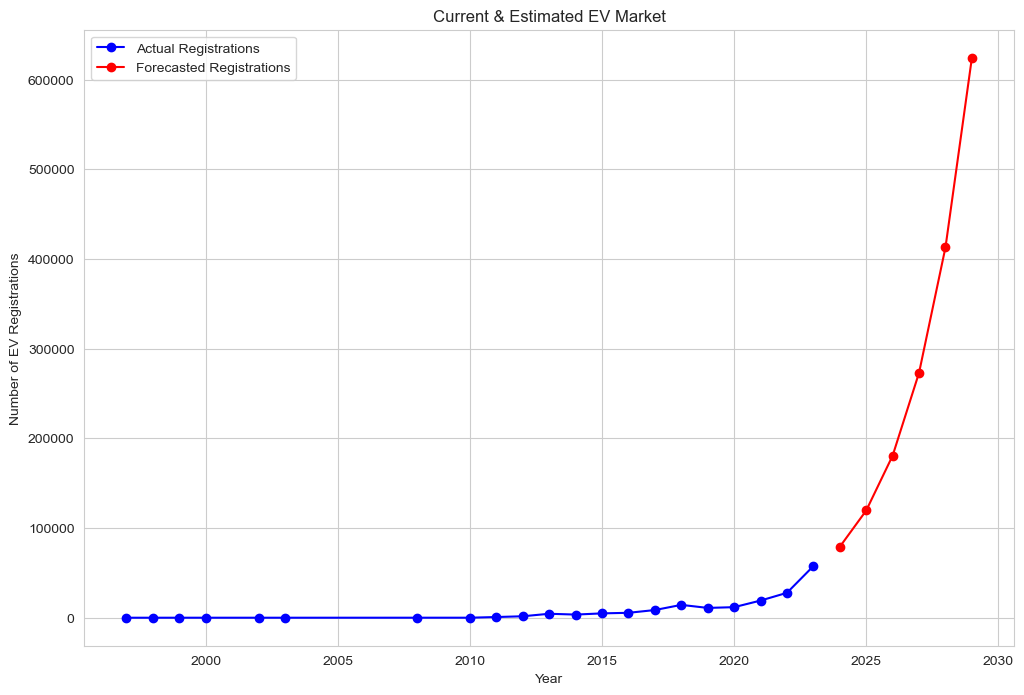

In [20]:
years = np.arange(filtered_years.index.min(), 2030)
actual_years = filtered_years.index
forecast_years = np.arange(2024, 2030)
actual_values = filtered_years.values
forecasted_values

plt.figure(figsize=(12,8))
plt.plot(actual_years, actual_values,'bo-', label='Actual Registrations')
plt.plot(forecast_years, forecasted_values, 'ro-', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show